In [1]:
from evaluation import (
    load_evaluations,
    compute_company_level_scores,
    compare_tiers,
    plot_tier_distributions,
    plot_robustness,
    plot_sorted_company_scores,
    set_angelcopilot_style,
)

set_angelcopilot_style()

In [2]:
dataset = load_evaluations(path="data/evaluation_dataset.csv")

We use Welch's t-test, instead of Student's t-test because it is more reliable when the samples have unequal variances and possibly unequal sample sizes. This is the case in our evaluation. 

In [3]:
company_scores = compute_company_level_scores(df=dataset)

In [4]:
company_scores

,Tier,Company Name,overall_mean,overall_std,n_evals
0,A,Company_1,3.916,0.085323,5
1,A,Company_2,4.330,0.148324,5
2,A,Company_3,4.100,0.141421,2
3,A,Company_4,4.135,0.049497,2
4,A,Company_5,4.195,0.007071,2
5,A,Company_6,4.100,0.000000,2
6,A,Company_7,4.325,0.106066,2
7,A,Company_8,4.200,0.000000,2
8,B,Company_10,3.830,NaN,1
9,B,Company_11,3.900,NaN,1


In [5]:
TierComparisonResult = compare_tiers(company_scores=company_scores)

In [6]:
TierComparisonResult

TierComparisonResult(mean_a=np.float64(4.162625), mean_b=np.float64(3.697), sd_a=np.float64(0.13430023667674096), sd_b=np.float64(0.4348959006985976), n_a=8, n_b=10, diff=np.float64(0.4656250000000002), t_stat=np.float64(3.2003408627796475), df=np.float64(11.071301166736049), p_value=np.float64(0.008384653852918537), cohen_d=np.float64(1.37737707935353))

Findings: 

- Tier A deals mean score is 4.16 (8 companies), while Tier B mean score is 3.7 (10 companies).
- Tier A deals are on average ~0.47 points higher than Tier B. Tier B companies are more spread out (0.43 vs 0.13 SD), which reflects the fact that easier to access deals are more heterogeneous.
- Statistical Significance for Welch T-test:
  - t-statistic=3.2
  - p-value= 0.0084 < 0.05 (significant)
- Cohen's d measures the effect size that quantifies teh difference between two group means. According to the rule of thumb, d > 0.8 signifies large effect. In our case d = 1.38 which shows very large effect size. This is interpreted as: _The Average Tier A company is 1.38 standard deviations above the average Tier B company based on the AngelCopilot's score._ 


<Axes: title={'center': 'AngelCopilot Score Distribution'}, xlabel='Overall score (company-level mean, 1–5 scale)', ylabel='Density'>

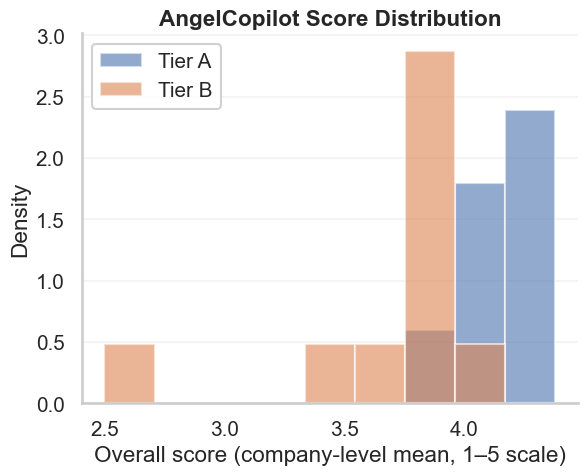

In [7]:
plot_tier_distributions(company_scores=company_scores)

When we plot the distributions of company-level scores, Tier A deals cluster tightly at the high end of the scale, while Tier B deals are shifted lower and much more spread out, with a clear low tail. There’s some overlap around the boundary (a few B deals look almost as strong as weaker A deals), but overall the whole Tier A distribution is clearly shifted to the right. That’s exactly what I’d expect from a useful rubric: it doesn’t perfectly separate every single deal, but it systematically scores our higher-quality bucket higher than the easier-access bucket.

<Axes: title={'center': 'Robustness of AngelCopilot scores (n ≥ 5 evals/company)'}, ylabel='Overall score (mean ± 1 SD)'>

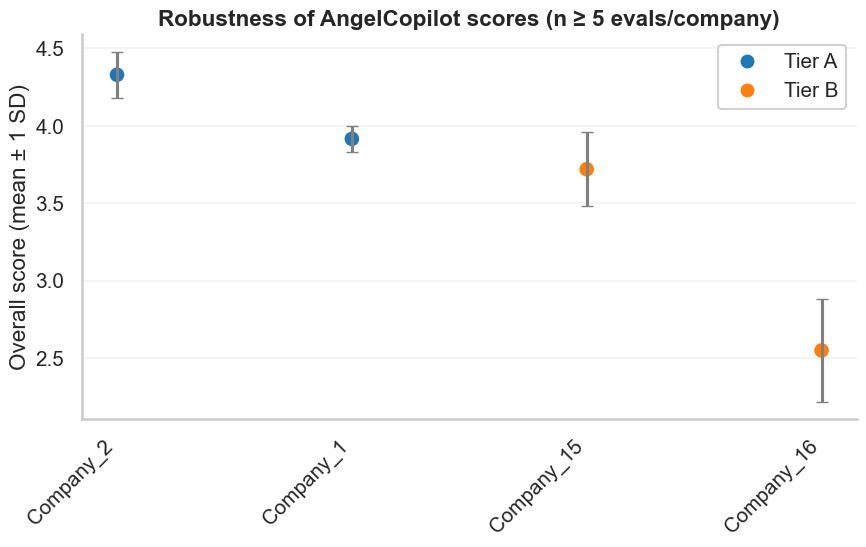

In [8]:
plot_robustness(company_scores=company_scores, min_evals=5)

To test robustness, we re-evaluated 2 Tier A and 2 Tier B companies 5 times each and plotted the mean ±1 standard deviation of their scores. The 1 S.D shows us how much does the score of a company typically move around when re-running the assessment.

The error bars are relatively small (typically a few tenths of a point) compared to the differences between companies and tiers.

In practice, this means AngelCopilot’s rubric is consistent: re-running it doesn’t dramatically change a company’s score, and the ‘noise’ from run-to-run variation is much smaller than the ‘signal’ that separates stronger (Tier A) deals from weaker (Tier B) ones.

_Re-running the evalution might move a company a few tenths of a point, but does not randomly flip a B-tier deal into Tier A territor or vice versa._ 

<Axes: title={'center': 'Company-level AngelCopilot scores (sorted)'}, xlabel='Overall score (company-level mean)'>

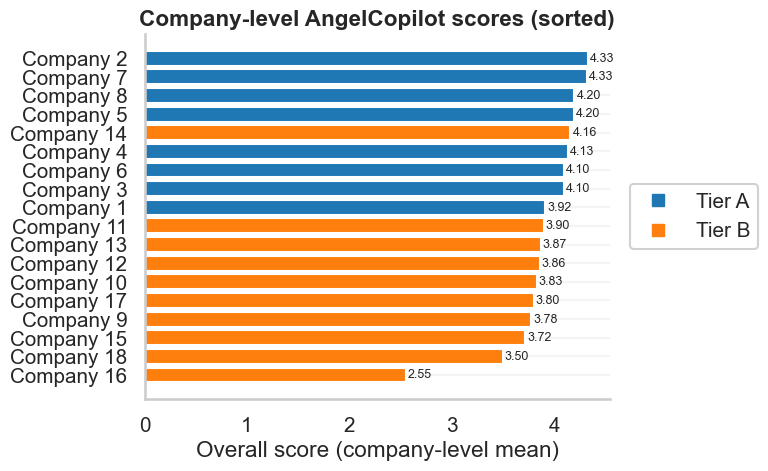

In [9]:
plot_sorted_company_scores(company_scores=company_scores)

This plot shows us that AngelCopilot sorts deals in a way that matches our prior (e.g. harder to get deals are rated higher than easier to get ones) 